# Genre Classification Analysis
<br>
<br>
<a href='#data_extraction'>1. Data Extraction</a><br>
<a href='#data_preprocessing'>2. Data Preprocessing</a><br>
<a href='#EDA'>3. Exploratory Data Analysis(EDA)</a><br>
<a href='#model_training'>4. Model Training</a>

In [4]:
# Import Bigquery packages
from google.cloud import bigquery
import pandas_gbq
%load_ext google.cloud.bigquery

# Set default project
pandas_gbq.context.project = 'snappy-boulder-378707'
pandas_gbq.context.dialect = 'standard'

# Set application credentials
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../BigQuery/letsgo-snappy-boulder-378707-4b7d46801fd1.json"

#Import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


<a id='data_extraction'></a>
## Extract Data From Bigquery

In [5]:
%%bigquery genre_df
SELECT * FROM snappy-boulder-378707.TrackGenre.Trackgenre

Query is running:   0%|          |

Downloading:   0%|          |

In [119]:
%%bigquery audio_feature_df
SELECT * FROM snappy-boulder-378707.AudioFeatures.AudioFeatures

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
genre_df

,track_id,Alternative,Blues,Cantopop,Classical,Dance Electronic,Folk & Acoustic,Hip-Hop,Indie,Instrumental,Jazz,K-Pop,Latin,Malay Pop,Mandopop,Metal,Musik Indonesia,Pop,R&B,Rock
0,001CyR8xqmmpVZFiTZJ5BC,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001eyxfoYptAWzvF4ewLrR,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,002LxxV7VTy5JkvkmmGanl,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,002YdWxaenIUL4PHiv5EB5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,002nFT2kRsfvS0d17AwWsB,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74920,7zo6QXVQfHlycm8dsxkRGv,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74921,7zswEelYoepv2FYsDaGhUD,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74922,7zuKKxwcxaeGPrhKoNWdMP,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74923,7zyfphPnDBks6j6uIjttMR,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [122]:
audio_feature_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.000,0.000289,0,-26.453,1,0.0000,0.9240,0.959000,0.1110,0.0000,0.000,66tcVcibuPYWs182LeINwu,189600,0
1,0.125,0.126000,0,-16.168,1,0.0364,0.1700,0.836000,0.1070,0.0303,162.399,1QVTJS7UUFWryqJ459TeL2,120000,3
2,0.125,0.031700,0,-23.849,1,0.0397,0.9560,0.819000,0.1250,0.0398,82.889,63LuatqjEm6RW3i469H4W0,846253,4
3,0.125,0.073400,0,-21.889,0,0.0351,0.5530,0.875000,0.1760,0.0347,96.982,7BmRd83zm8CHffrAPe2ZR7,710000,4
4,0.125,0.009780,0,-36.518,1,0.0412,0.9360,0.812000,0.1140,0.0380,72.172,3fwtXQDY5TliCI1CiAqs8U,178983,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74851,0.756,0.913000,11,-3.486,0,0.0523,0.2340,0.000000,0.0431,0.8690,110.955,7g9UMHzfI9w8StnZLVh8jV,196253,4
74852,0.881,0.696000,11,-3.838,0,0.0797,0.1370,0.000041,0.0927,0.7810,97.002,3mQ6SLdxxaL52Yte7KF2Ks,200667,4
74853,0.881,0.361000,11,-14.728,0,0.2370,0.0502,0.004580,0.2460,0.7990,96.430,4HfxDJ0uLHTLe0fZrx0MbQ,216693,4
74854,0.881,0.441000,11,-6.278,0,0.0646,0.4800,0.000009,0.1190,0.8040,138.014,5wfllwdjglyQislkskYLBv,221240,4


<a id='data_preprocessing'></a>
## Data Preprocessing

In [157]:
# Merge Genre and Audio Features dataframes
merged_df = pd.merge(audio_feature_df, genre_df, how="inner", right_on="track_id", left_on="id")
pd.set_option('display.max_columns', None)
merged_df = merged_df.drop(['track_id'],axis = 1)
merged_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,Alternative,Blues,Cantopop,Classical,Dance Electronic,Folk & Acoustic,Hip-Hop,Indie,Instrumental,Jazz,K-Pop,Latin,Malay Pop,Mandopop,Metal,Musik Indonesia,Pop,R&B,Rock
0,0.000,0.000289,0,-26.453,1,0.0000,0.9240,0.959000,0.1110,0.0000,0.000,66tcVcibuPYWs182LeINwu,189600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.125,0.126000,0,-16.168,1,0.0364,0.1700,0.836000,0.1070,0.0303,162.399,1QVTJS7UUFWryqJ459TeL2,120000,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.125,0.031700,0,-23.849,1,0.0397,0.9560,0.819000,0.1250,0.0398,82.889,63LuatqjEm6RW3i469H4W0,846253,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.125,0.073400,0,-21.889,0,0.0351,0.5530,0.875000,0.1760,0.0347,96.982,7BmRd83zm8CHffrAPe2ZR7,710000,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.125,0.009780,0,-36.518,1,0.0412,0.9360,0.812000,0.1140,0.0380,72.172,3fwtXQDY5TliCI1CiAqs8U,178983,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74851,0.756,0.913000,11,-3.486,0,0.0523,0.2340,0.000000,0.0431,0.8690,110.955,7g9UMHzfI9w8StnZLVh8jV,196253,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74852,0.881,0.696000,11,-3.838,0,0.0797,0.1370,0.000041,0.0927,0.7810,97.002,3mQ6SLdxxaL52Yte7KF2Ks,200667,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
74853,0.881,0.361000,11,-14.728,0,0.2370,0.0502,0.004580,0.2460,0.7990,96.430,4HfxDJ0uLHTLe0fZrx0MbQ,216693,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
74854,0.881,0.441000,11,-6.278,0,0.0646,0.4800,0.000009,0.1190,0.8040,138.014,5wfllwdjglyQislkskYLBv,221240,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
merged_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Alternative,Blues,Cantopop,Classical,Dance Electronic,Folk & Acoustic,Hip-Hop,Indie,Instrumental,Jazz,K-Pop,Latin,Malay Pop,Mandopop,Metal,Musik Indonesia,Pop,R&B,Rock
count,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,7.485600e+04,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000,74856.000000
mean,0.550745,0.491749,5.215587,-11.240418,0.647350,0.072116,0.472522,0.292626,0.165820,0.412278,117.163029,2.227958e+05,3.874185,0.034680,0.052140,0.038982,0.062413,0.054211,0.067757,0.042428,0.059434,0.225339,0.050711,0.129395,0.067650,0.021628,0.051833,0.038327,0.034560,0.029937,0.034480,0.048119
std,0.186376,0.291544,3.538868,7.762790,0.477798,0.077005,0.373475,0.397042,0.131428,0.254743,31.120135,9.321561e+04,0.461967,0.182969,0.222311,0.193552,0.241906,0.226435,0.251330,0.201565,0.236437,0.417808,0.219408,0.335639,0.251146,0.145467,0.221691,0.191986,0.182663,0.170416,0.182459,0.214019
min,0.000000,0.000097,0.000000,-47.903000,0.000000,0.000000,0.000000,0.000000,0.007240,0.000000,0.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,0.243000,2.000000,-14.197000,0.000000,0.035100,0.081975,0.000000,0.097300,0.197000,92.050000,1.714130e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568000,0.506000,5.000000,-8.623000,1.000000,0.044500,0.446000,0.001440,0.114000,0.378000,117.030500,2.103285e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.692000,0.739000,8.000000,-5.787000,1.000000,0.070200,0.866000,0.806000,0.180000,0.608000,137.556750,2.541600e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.984000,1.000000,11.000000,1.519000,1.000000,0.962000,0.996000,0.997000,1.000000,0.987000,237.488000,4.170227e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## EDA

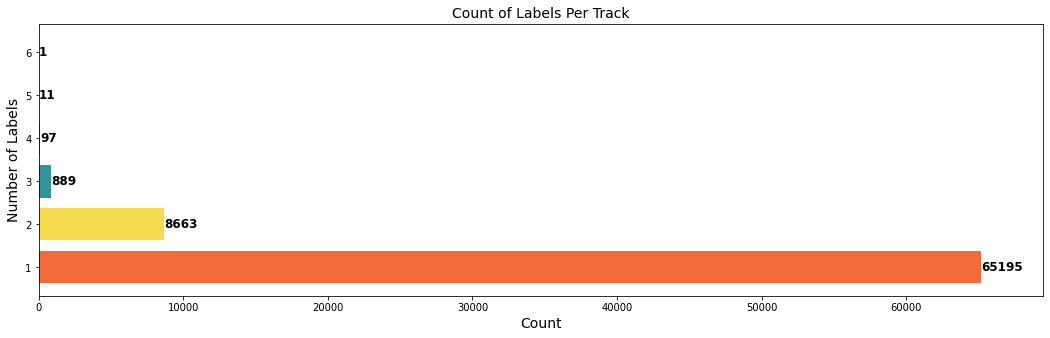

In [146]:
from matplotlib.axes import Axes
class_number_counts = merged_df[['Alternative', 'Blues', 'Cantopop', 'Classical',
       'Dance Electronic', 'Folk & Acoustic', 'Hip-Hop', 'Indie',
       'Instrumental', 'Jazz', 'K-Pop', 'Latin', 'Malay Pop', 'Mandopop',
       'Metal', 'Musik Indonesia', 'Pop', 'R&B', 'Rock']].sum(axis = 1).value_counts()



fig, ax = plt.subplots(figsize=(18,5))
ax.barh(class_number_counts.index, class_number_counts, height=0.75, color= ['#F26B38', '#F7DB4F','#2F9599','#2F9599','#A7226E', '#EC2049' ])
plt.title('Count of Labels Per Track',size = 14)
plt.xlabel('Count',size = 14)
plt.ylabel('Number of Labels',size = 14)
_, xmax = plt.xlim()
plt.xlim(0, xmax + 1000)
#adding the text labels
for i, v in enumerate(class_number_counts):
    ax.text(v, i + 1, str(v), color='black', fontweight='bold', fontsize=12, ha='left', va='center')
plt.show()

Text(0.5, 1.0, 'Number of Tracks in Each Genre')

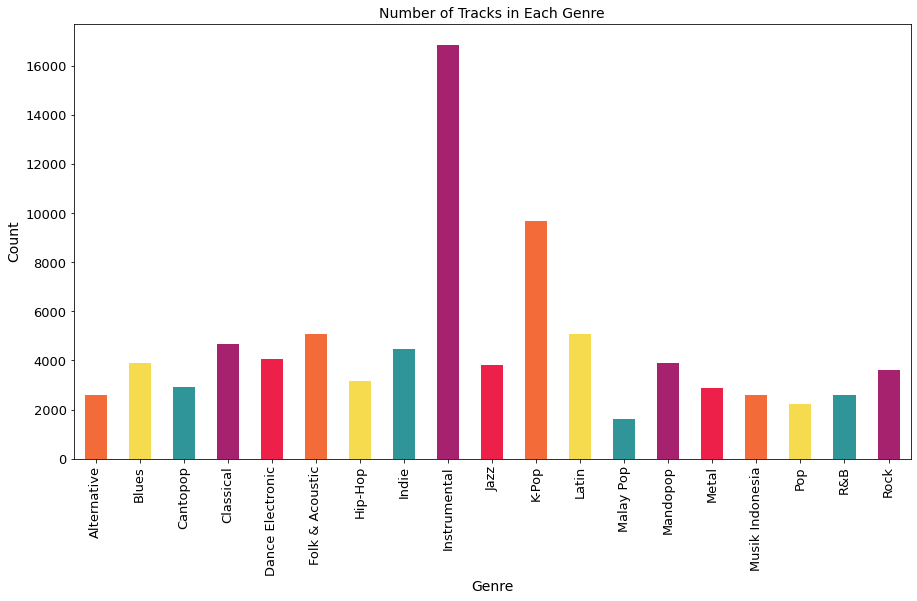

In [147]:
counts_per_label = merged_df[['Alternative', 'Blues', 'Cantopop', 'Classical',
       'Dance Electronic', 'Folk & Acoustic', 'Hip-Hop', 'Indie',
       'Instrumental', 'Jazz', 'K-Pop', 'Latin', 'Malay Pop', 'Mandopop',
       'Metal', 'Musik Indonesia', 'Pop', 'R&B', 'Rock']].sum()
counts_per_label.plot(kind = 'bar',color= ['#F26B38', '#F7DB4F','#2F9599','#A7226E', '#EC2049'],figsize=(15,8),fontsize = 13)
plt.xlabel('Genre',size = 14)
plt.ylabel('Count',size = 14)
plt.title('Number of Tracks in Each Genre',size = 14)

<a id='model_training'></a>
## Model Training

<br>
<br>
Since we are dealing with a classification problem, several models will be tried: <br>
1. Support Vector Machine<br>
2. Naive Bayes<br>
3. Stochastic Gradient Descent Classifier<br>
4. Logistic Regression<br>
5. Random Forest

In [168]:
# Split train/test data
from sklearn.model_selection import train_test_split
X_labels = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms', 'time_signature']
y_labels = ['Alternative', 'Blues',
       'Cantopop', 'Classical', 'Dance Electronic', 'Folk & Acoustic',
       'Hip-Hop', 'Indie', 'Instrumental', 'Jazz', 'K-Pop', 'Latin',
       'Malay Pop', 'Mandopop', 'Metal', 'Musik Indonesia', 'Pop', 'R&B',
       'Rock']
X_train, X_test, y_train, y_test = train_test_split(merged_df[X_labels], merged_df[y_labels], test_size=0.3, random_state=42)

# Standardise
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stan = pd.DataFrame(scaler.fit_transform(X_train),columns=X_labels)
X_test_stan = pd.DataFrame(scaler.transform(X_test),columns=X_labels)

#### 1. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
svc = SVC(gamma="scale")
SVC = MultiOutputClassifier(estimator=svc)
model.fit(X_train_stan, y_train)

In [ ]:
y_predict = model.predict(X_test_stan)
auc_y1 = roc_auc_score(y_test[:,0],y_predict[:,0])
auc_y2 = roc_auc_score(y_test[:,1],y_predict[:,1])
yhat = model.predict(xtest)
print("ROC AUC y1: %.4f, y2: %.4f" % (auc_y1, auc_y2))
ROC AUC y1: 0.9206, y2: 0.9202